In [273]:
# Importing required Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import random
import math

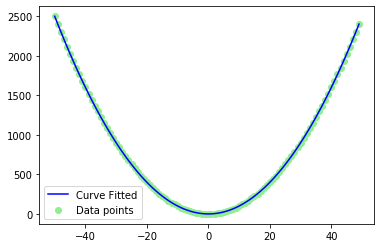

In [274]:
# Creating Dataset

# Function used -->> y = x*x

x_coordinate = np.arange(-50,50)
y_coordinate = [x*x for x in x_coordinate]

plt.scatter(x_coordinate, y_coordinate, c ='LightGreen', label = 'Data points')
plt.plot(x_coordinate, y_coordinate, 'b', label = 'Curve Fitted')
plt.legend()
plt.show()

X = x_coordinate
Y = y_coordinate

points = 100


In [275]:
# Splitting the dataset for Train and Test
X_train, X_test, Y_train, Y_test = tts( X, Y, test_size = 0.3, random_state = 100)


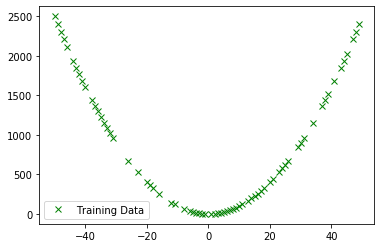

In [276]:
plt.plot(X_train, Y_train, 'gx', label = 'Training Data')
plt.legend()
plt.show()

In [277]:
# Variable Initialization

generalization_factor = 20
association_value = 35
weights = np.ones((35,1))
learning_rate = 1

In [278]:
index1 = 0 # index values stored for the Training Data
index2 = 0 # index values stored for the Testing Data

weight1 = [] # weights associated with indices of Testing Data
weight2 = [] # weights associated with indices of Training Data

In [279]:
def weightCalc(indexval, generalization_factor):
    weights = []
    index = []
    avg_weight = []
    gf = generalization_factor/2
    index = math.floor(indexval - gf)
    avg_weight = math.ceil(indexval - gf) - (indexval - gf)
    
    highest_block = []
    highest_block.append(index)
    highest_block.append(avg_weight)
    
    if avg_weight != 0:
        weights.append(top_edge)
        
    for index in range(math.ceil(indexval - gf), math.floor(indexval +gf + 1)):
        middle_block = []
        middle_block.append(index)
        middle_block.append(1)
        weights.append(middle_block)
        
    index = math.floor(indexval + generalization_factor/2)
    avg_weight = (indexval + generalization_factor/2) - math.floor(indexval+generalization_factor/2)
    
    lowest_block = []
    lowest_block.append(index)
    lowest_block.append(avg_weight)
    
    if avg_weight != 0:
        weights.append(lowest_block)
    return weights



In [280]:
def weightIndx(i, generalization_factor, association_value, points):
    i = int(i)
    asindx = generalization_factor/2 + ((association_value - 2*(generalization_factor/2))*i)/points
    return math.floor(asindx) 

In [281]:
def rootMeanSquare(weights, ovr_weight, X, Y):
    meansqr = 0
    for i in range(0,len(ovr_weight)):
        summation_ovr = 0
        for j in ovr_weight[i]:
            summation_ovr = summation_ovr + (weights[j[0]]*j[1])
        meansqr = meansqr + (summation_ovr - Y_train[i])**2
    
    root_msqr = math.sqrt(meansqr)
    return meansqr

def Result(weights,ovr_weight):
    output = []
    for i in range(0,len(ovr_weight)):
        summation_ovr = 0
        for j in ovr_weight[i]:
            summation_ovr = summation_ovr + (weights[j[0]]*j[1])
        output.append(summation_ovr)
    return output

In [282]:
for indexval in X_train:
    index1 = weightIndx(indexval, generalization_factor , association_value, points)
    weight1.append(weightCalc(index1, generalization_factor))

for index_of_x in X_test:
    index2 = (weightIndx(index_of_x, generalization_factor , association_value, points))
    weight2.append(weightCalc(index2, generalization_factor))
    

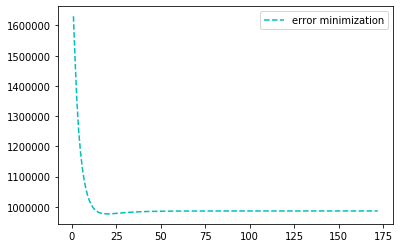

In [283]:
err_list = []
err_plot = []

oldError = 0
presentError = 10
repetitions = 0
error_threshold = 0.0002

while repetitions >= 0 and abs(oldError - presentError) > error_threshold:
    oldError = presentError
    for i in range(0,len(weight1)):
        summation_ovr = 0
        for j in weight1[i]:
            summation_ovr = summation_ovr + weights[j[0]]*j[1]
        error = summation_ovr - Y_train[i]
        solution  = error/generalization_factor
        for j in weight1[i]:
            weights[j[0]] = weights[j[0]] - learning_rate*solution*j[1]
    presentError = float(rootMeanSquare(weights,weight1,X_train,Y_train))
    err_list.append(presentError)
    repetitions = repetitions + 1
    err_plot.append(repetitions)

plt.figure(2)
plt.plot(np.asarray(err_plot), np.asarray(err_list), 'c--',label = 'error minimization')
plt.legend()
plt.show()

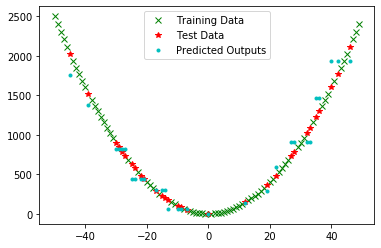

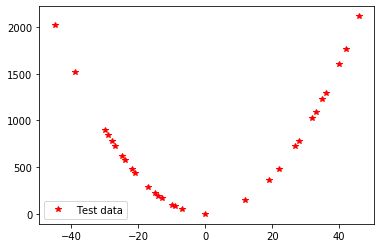

In [284]:
#Testing procedure

output = Result(weights, ovr_test.weight)
Accuracy =float(meanSquare(weights,ovr_test.weight,X_test,Y_test))

plt.figure(3)
plt.plot(X_train,Y_train,'gx',label = 'Training Data')
plt.plot(X_test,Y_test,'r*',label = 'Test Data')
plt.plot(X_test,np.asarray(output),'c.', label = 'Predicted Outputs')
plt.legend()
plt.show()

plt.plot(X_test,Y_test,'r*',label = 'Test data')
plt.legend()
plt.show()